In [1]:
import json
import matplotlib.pyplot as plt
import networkx as nx
import re

In [2]:
super_edges= json.load(open("super_edges_dic.json","r", encoding="utf-8"))
super_edges_tuples = list(tuple(list(super_edges.keys())[i].split('_')) for i in range(len(super_edges)))

In [3]:
err_conn = [('Lublin\xa0Główny', 'Legnica'), ('Warszawa\xa0Gdańska', 'Łódź\xa0Widzew'),  ('Kraków\xa0Główny', 'Sokółka') , 
 ('Świnoujście', 'Białystok'),  ('Poznań\xa0Główny', 'Łódź\xa0Widzew'), ('Zielona\xa0Góra\xa0Główna', 'Lublin\xa0Główny'),
 ('Szczecin\xa0Główny','Białystok')]

for conn in err_conn:
    print("try to delete" + conn[0] + conn[1])
    try:
        super_edges_tuples.remove(conn)
    except:
        pass

try to deleteLublin GłównyLegnica
try to deleteWarszawa GdańskaŁódź Widzew
try to deleteKraków GłównySokółka
try to deleteŚwinoujścieBiałystok
try to deletePoznań GłównyŁódź Widzew
try to deleteZielona Góra GłównaLublin Główny
try to deleteSzczecin GłównyBiałystok


In [4]:
pos = json.load(open("station_pos_new.json","r", encoding="utf-8"))
pos["Jagodin"] = [23.895798884090656,  51.19818428908686]
pos["Jarosław"] = [22.677651659198048, 50.011096189470834]
pos["Chałupki"] = [18.311526302001212, 49.925748636690045]
pos["Kostrzyn"] = [14.647305794898253, 52.591351788760555]
new_pos = {}

nodes = list(pos.keys())

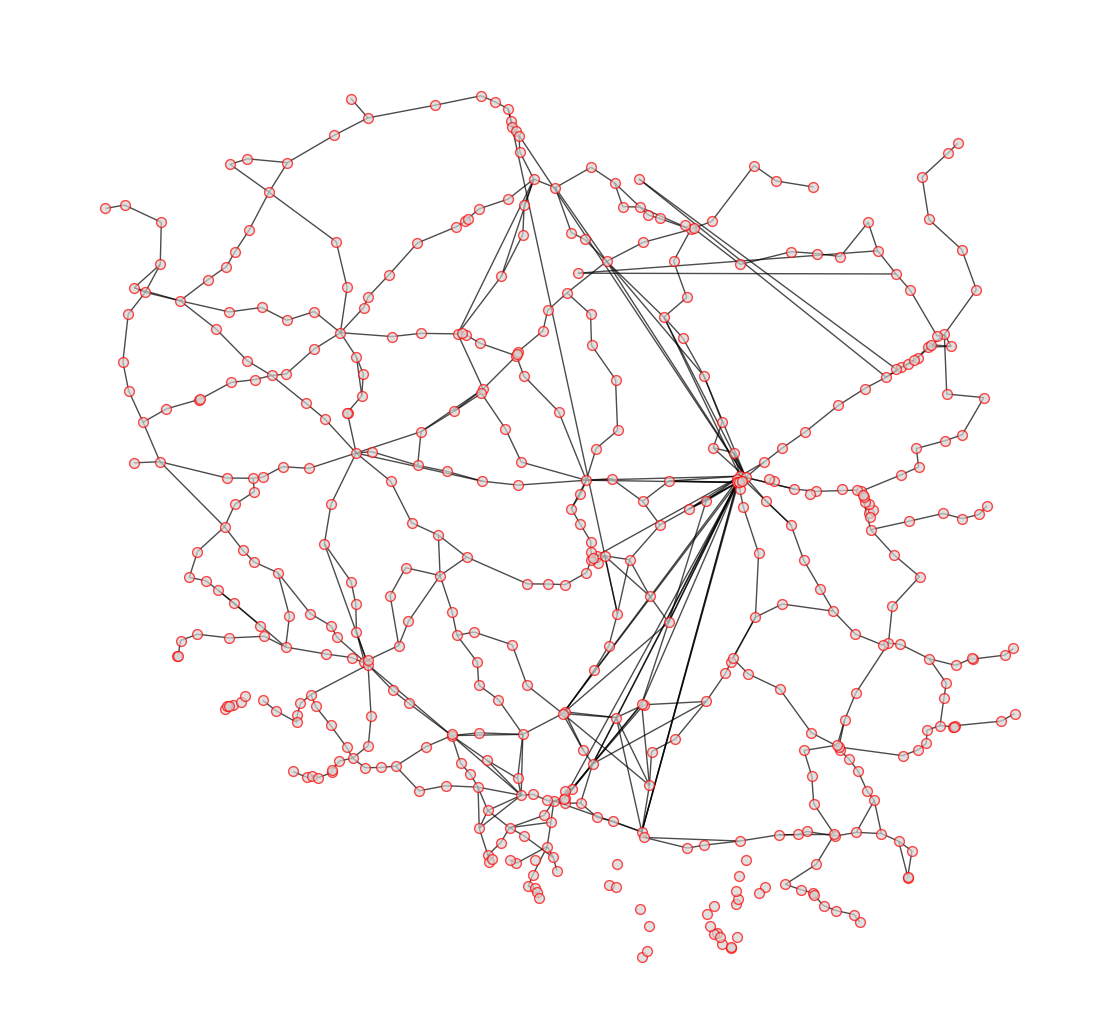

In [7]:
# SAME GŁÓWNE NODESY

plt.figure(figsize=(11,10))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(super_edges_tuples)
labels = {node: "-".join([w[:2] for w in re.split('\s',node)]) for node in G.nodes()}
nx.draw(G,pos,node_size=50,alpha=0.7,edgecolors='red', node_color='lightgray')

In [95]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc

# Network Definition
g = G

# Model Selection
model_sis = ep.SISModel(g)

beta = 0.51393
gamma  = 0.39094

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', beta)
config.add_model_parameter('lambda',gamma)
config.add_model_parameter("fraction_infected", 0.2)
model_sis.set_initial_status(config)

# Simulation
iterations = model_sis.iteration_bunch(200)
trends = model_sis.build_trends(iterations)


from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

viz = DiffusionTrend(model_sis, trends)
p = viz.plot(width=400, height=400)
show(p)

In [99]:
# Model Selection
model_sir = ep.SIRModel(g)

beta = 0.51393
gamma  = 0.39094

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', beta)
config.add_model_parameter('gamma', gamma)
config.add_model_parameter("fraction_infected", 0.2)
model_sir.set_initial_status(config)

# Simulation
iterations = model_sir.iteration_bunch(200)
trends = model_sir.build_trends(iterations)


from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

viz2 = DiffusionTrend(model_sir, trends)
p = viz2.plot(width=400, height=400)
show(p)

In [81]:
import pandas as pd
params = pd.read_csv("data/wyestymowane_parametry_SIR_2.csv", sep=" ")



In [103]:

import matplotlib.pyplot as plt
import numpy as np

### SIR

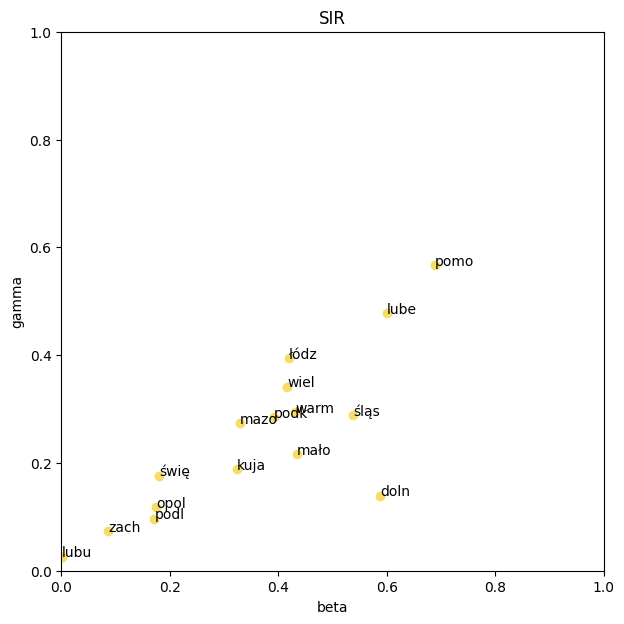

Sredni błąd:  0.14238070128644859


In [115]:
params = pd.read_csv("data/wyestymowane_parametry_SIR_2.csv", sep=" ")
fig, ax  = plt.subplots(figsize = (7,7))
#a1 = fig.add_axes([0,0,1,1])
x = list(params["beta_sr"])
y =list( params["gamma_sr"])
ax.scatter(x, y, color = "#F6DC68")
ax.set_title("SIR")
ax.set_ylabel('gamma')
ax.set_xlabel('beta')
for i, txt in enumerate(params["wojewodztwo"]):
    ax.annotate(txt[0:4], (x[i], y[i]))
ax.set_ylim(0,1)
ax.set_xlim(0,1)
plt.show()
print("Sredni błąd: ", np.mean(params["błąd_sr"]))

### SIR(>5) 

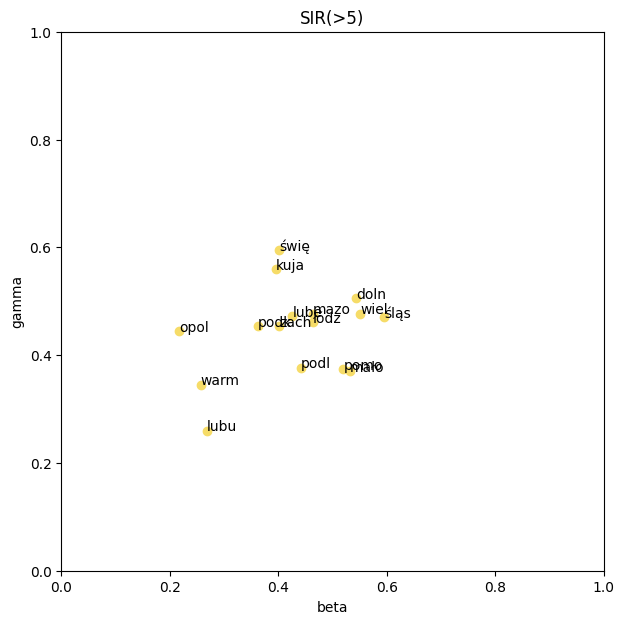

Sredni błąd:  0.0986572744920736


In [117]:
params = pd.read_csv("data/wyestymowane_parametry_SIR_5_2.csv", sep=" ")
fig, ax  = plt.subplots(figsize = (7,7))
#a1 = fig.add_axes([0,0,1,1])
x = list(params["beta_sr"])
y =list( params["gamma_sr"])
ax.scatter(x, y, color = "#F6DC68")
ax.set_title("SIR(>5)")
ax.set_ylabel('gamma')
ax.set_xlabel('beta')
for i, txt in enumerate(params["wojewodztwo"]):
    ax.annotate(txt[0:4], (x[i], y[i]))
ax.set_ylim(0,1)
ax.set_xlim(0,1)
plt.show()
print("Sredni błąd: ", np.mean(params["błąd_sr"]))

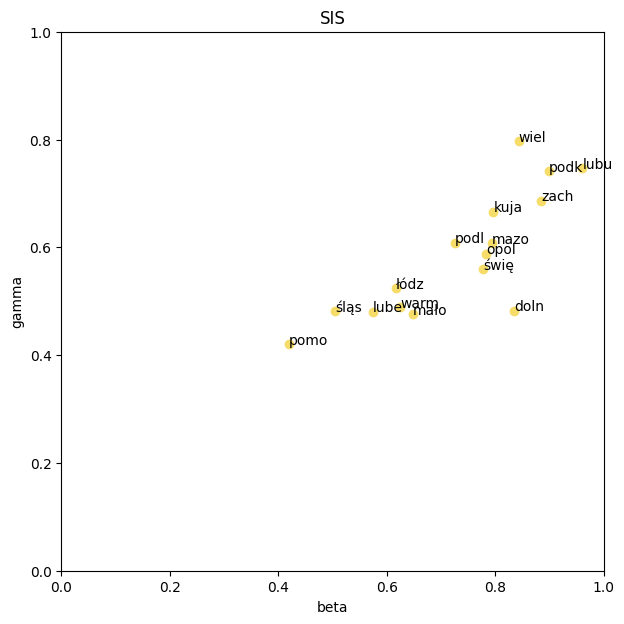

Sredni błąd:  0.1378068436116705


In [120]:
params = pd.read_csv("data/wyestymowane_parametry_SIS_2.csv", sep=" ")
fig, ax  = plt.subplots(figsize = (7,7))
#a1 = fig.add_axes([0,0,1,1])
x = list(params["beta_sr"])
y =list( params["gamma_sr"])
ax.scatter(x, y, color = "#F6DC68")
ax.set_title("SIS")
ax.set_ylabel('gamma')
ax.set_xlabel('beta')
for i, txt in enumerate(params["wojewodztwo"]):
    ax.annotate(txt[0:4], (x[i], y[i]))
ax.set_ylim(0,1)
ax.set_xlim(0,1)
plt.show()
print("Sredni błąd: ", np.mean(params["błąd_sr"]))

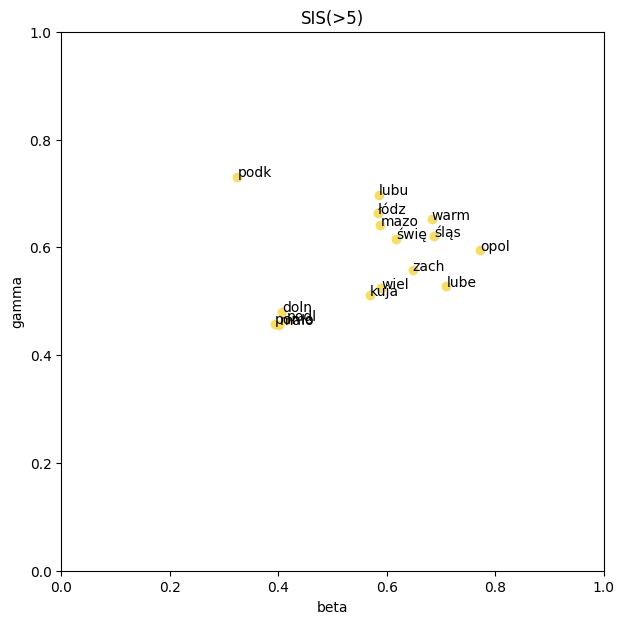

Sredni błąd:  0.09660790943111305


In [118]:
params = pd.read_csv("data/wyestymowane_parametry_SIS_5_2.csv", sep=" ")
fig, ax  = plt.subplots(figsize = (7,7))
#a1 = fig.add_axes([0,0,1,1])
x = list(params["beta_sr"])
y =list( params["gamma_sr"])
ax.scatter(x, y, color = "#F6DC68")
ax.set_title("SIS(>5)")
ax.set_ylabel('gamma')
ax.set_xlabel('beta')
for i, txt in enumerate(params["wojewodztwo"]):
    ax.annotate(txt[0:4], (x[i], y[i]))
ax.set_ylim(0,1)
ax.set_xlim(0,1)
plt.show()
print("Sredni błąd: ", np.mean(params["błąd_sr"]))

### netto

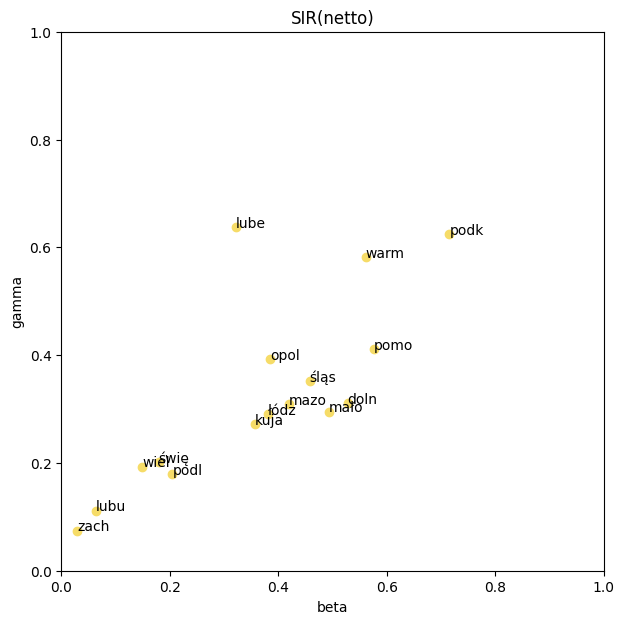

Sredni błąd:  0.055384362321010724


In [116]:
params = pd.read_csv("data/wyestymowane_parametry_SIR_net.csv", sep=" ")
fig, ax  = plt.subplots(figsize = (7,7))
#a1 = fig.add_axes([0,0,1,1])
x = list(params["beta_sr"])
y =list( params["gamma_sr"])
ax.scatter(x, y, color = "#F6DC68")
ax.set_title("SIR(netto)")
ax.set_ylabel('gamma')
ax.set_xlabel('beta')
for i, txt in enumerate(params["wojewodztwo"]):
    ax.annotate(txt[0:4], (x[i], y[i]))
ax.set_ylim(0,1)
ax.set_xlim(0,1)
plt.show()
print("Sredni błąd: ", np.mean(params["błąd_sr"]))

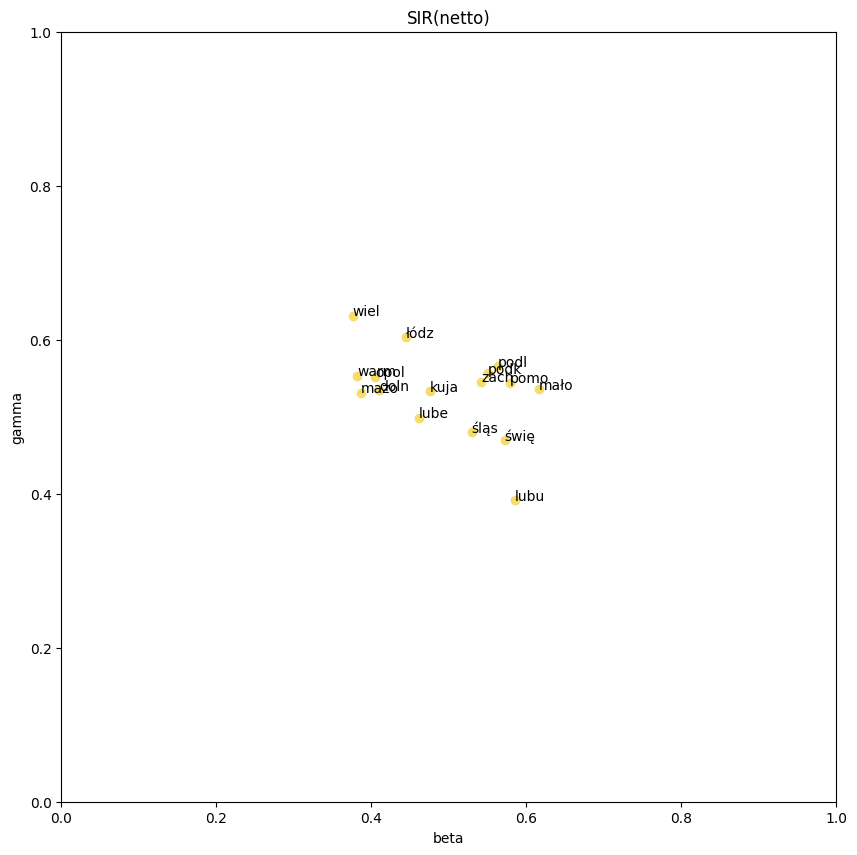

Sredni błąd:  0.006443332041693631


In [109]:
params = pd.read_csv("data/wyestymowane_parametry_SIR_net_5.csv", sep=" ")
fig, ax  = plt.subplots(figsize = (10,10))
#a1 = fig.add_axes([0,0,1,1])
x = list(params["beta_sr"])
y =list( params["gamma_sr"])
ax.scatter(x, y, color = "#F6DC68")
ax.set_title("SIR(netto)")
ax.set_ylabel('gamma')
ax.set_xlabel('beta')
for i, txt in enumerate(params["wojewodztwo"]):
    ax.annotate(txt[0:4], (x[i], y[i]))
ax.set_ylim(0,1)
ax.set_xlim(0,1)
plt.show()
print("Sredni błąd: ", np.mean(params["błąd_sr"]))

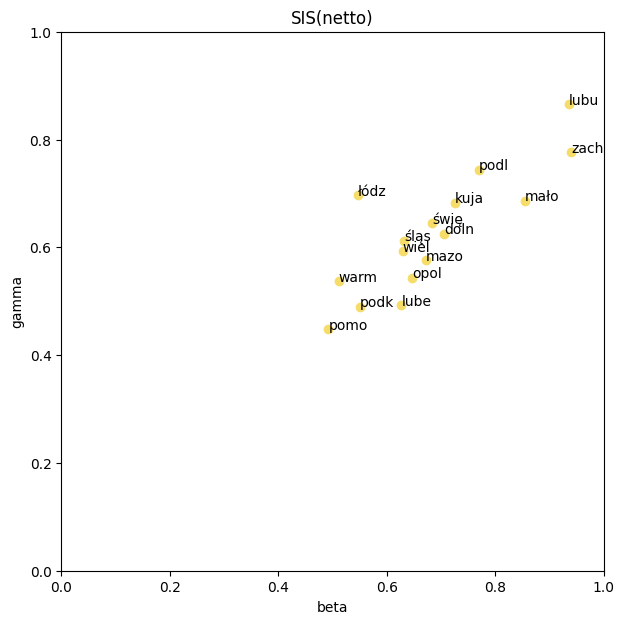

Sredni błąd:  0.0506758444621346


In [119]:
params = pd.read_csv("data/wyestymowane_parametry_SIS_net.csv", sep=" ")
fig, ax  = plt.subplots(figsize = (7,7))
#a1 = fig.add_axes([0,0,1,1])
x = list(params["beta_sr"])
y =list( params["gamma_sr"])
ax.scatter(x, y, color = "#F6DC68")
ax.set_title("SIS(netto)")
ax.set_ylabel('gamma')
ax.set_xlabel('beta')
for i, txt in enumerate(params["wojewodztwo"]):
    ax.annotate(txt[0:4], (x[i], y[i]))
ax.set_ylim(0,1)
ax.set_xlim(0,1)
plt.show()
print("Sredni błąd: ", np.mean(params["błąd_sr"]))